In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('cleaned_train.csv')
df.head()

,brand,vehiclemodel,manufacturingyear,type,rating,color,duty,fuel,cylindercount,type_of_gear,capacity,turbo,odometer,airbags,price
0,other,mazda 6 touring,2017.0,sedan,0.0,other,1249.0,gas,4.0,auto,2.5,no,75492.0,12.0,21012.0
1,hyundai,h1,2009.0,minivan,0.0,metallic,1185.0,diesel,4.0,auto,2.5,no,50653.0,4.0,22433.0
2,opel,corsa,1995.0,hatchback,5.0,jet black,742.0,diesel,4.0,auto,0.0,no,230000.0,0.0,5645.0
3,subaru,outback.,2007.0,hatchback,4.0,sapphire blue,1327.0,gas,4.0,auto,2.5,no,131000.0,4.0,10976.0
4,volkswagen,cc,2010.0,sedan,3.0,metallic,836.0,gas,4.0,auto,2.0,no,66000.0,12.0,12900.0


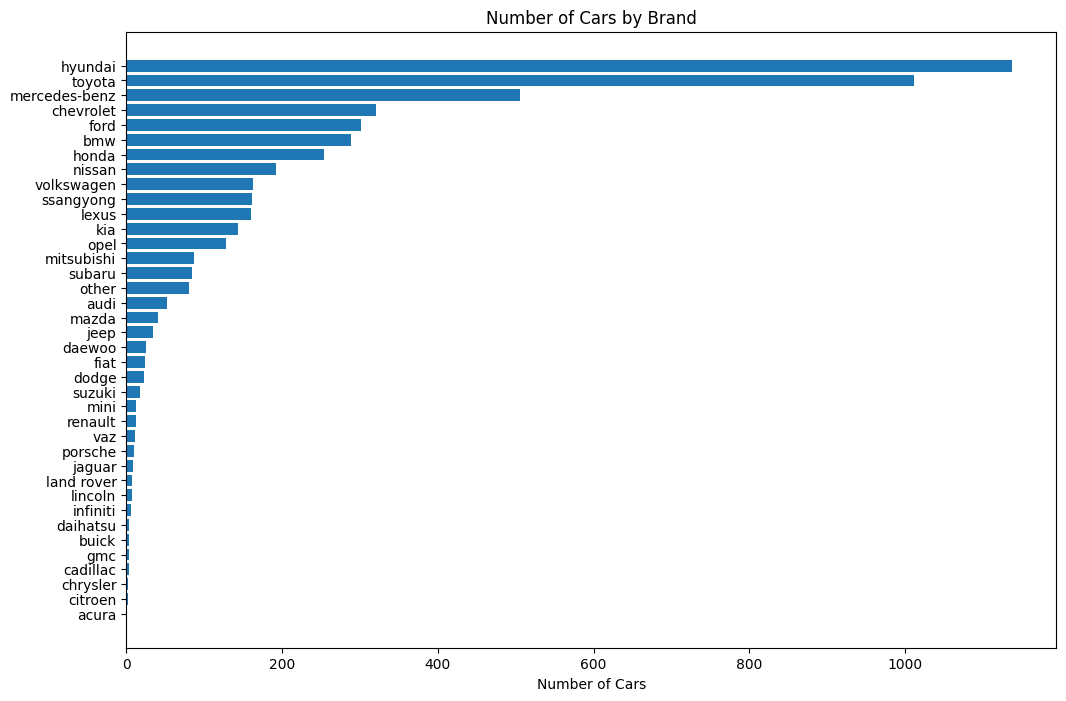

In [3]:
plt.figure(figsize=(12, 8))
plt.barh(df['brand'].value_counts()[::-1].index, df['brand'].value_counts()[::-1].values)

plt.title('Number of Cars by Brand')
plt.xlabel('Number of Cars')
plt.show()

Most common car brand is hyundai

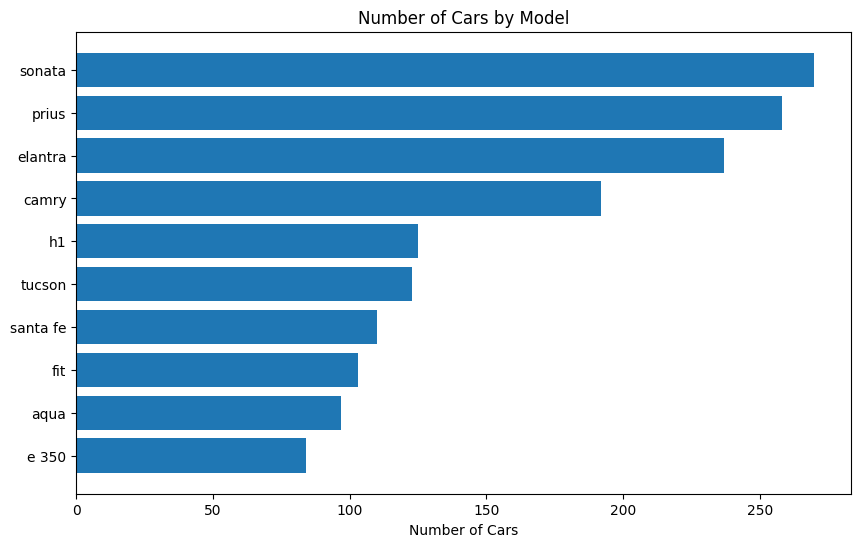

In [4]:
models = df['vehiclemodel'].value_counts().index[::-1]
models_count = df['vehiclemodel'].value_counts().values[::-1]

plt.figure(figsize=(10, 6))
plt.barh(models[-10:], models_count[-10:])

plt.title('Number of Cars by Model')
plt.xlabel('Number of Cars')
plt.show()

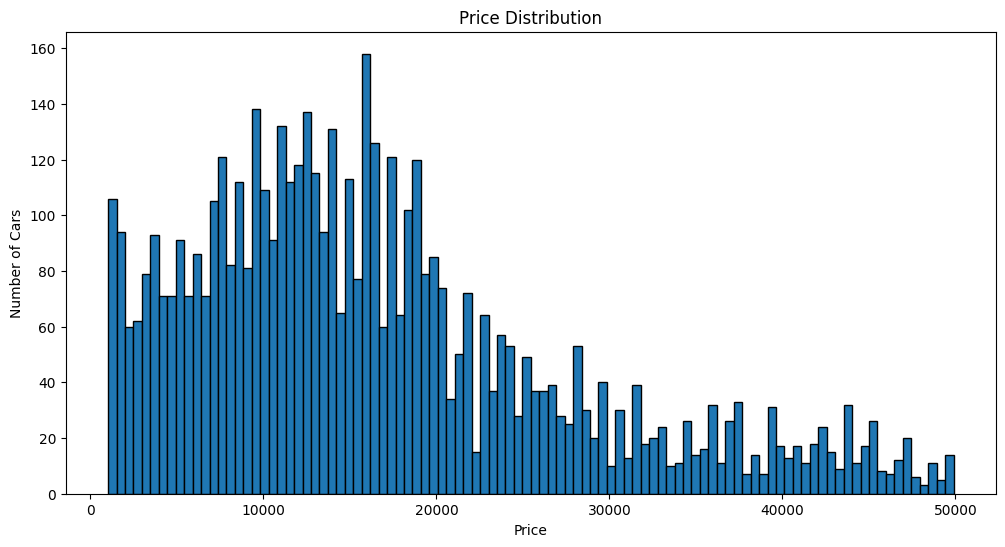

In [18]:
prices = df['price']

plt.figure(figsize=(12, 6))
plt.hist(prices, bins=100, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()

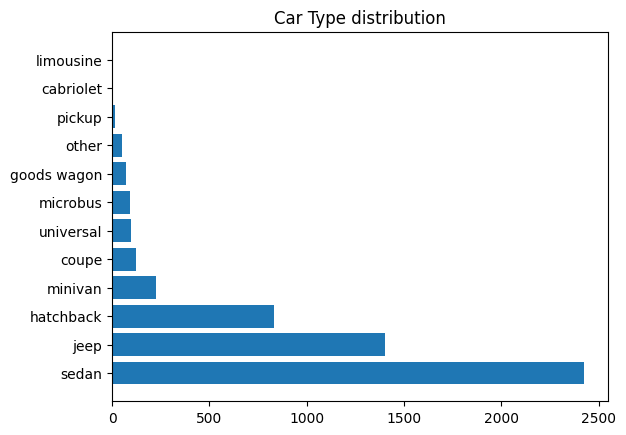

In [22]:
plt.barh(df['type'].value_counts().index, df['type'].value_counts().values)
plt.title('Car Type distribution')
plt.show()

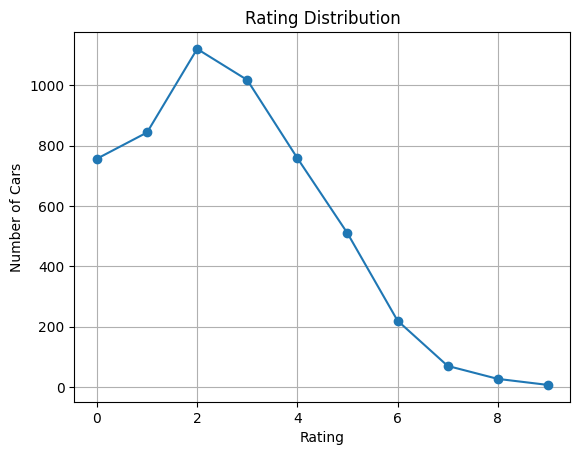

In [30]:
plt.plot(df['rating'].value_counts().sort_index().index, df['rating'].value_counts().sort_index().values, marker='o')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

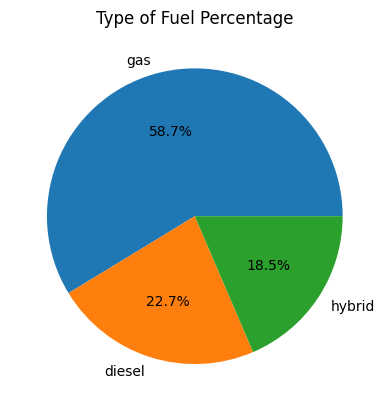

In [31]:
plt.pie(df['fuel'].value_counts().values, labels=df['fuel'].value_counts().index, autopct='%1.1f%%')
plt.title('Type of Fuel Percentage')
plt.show()

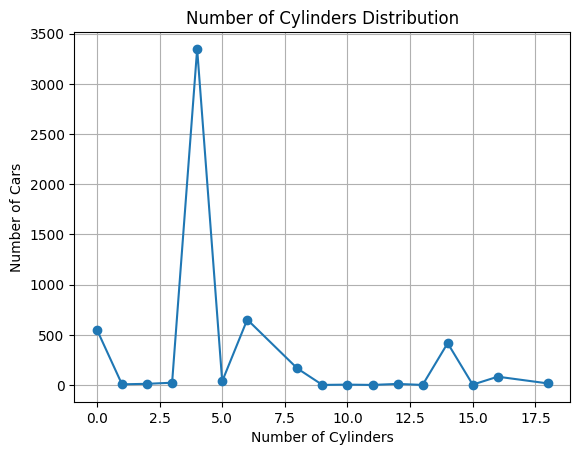

In [32]:
plt.plot(df['cylindercount'].value_counts().sort_index().index, df['cylindercount'].value_counts().sort_index().values, marker='o')
plt.title('Number of Cylinders Distribution')
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

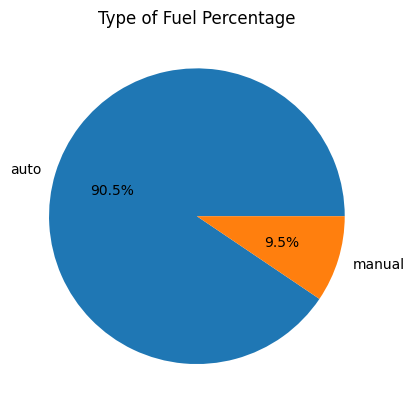

In [33]:
plt.pie(df['type_of_gear'].value_counts().values, labels=df['type_of_gear'].value_counts().index, autopct='%1.1f%%')
plt.title('Type of Fuel Percentage')
plt.show()

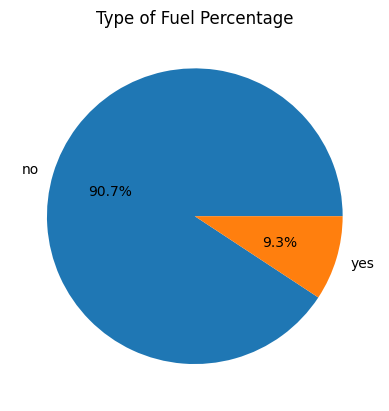

In [38]:
plt.pie(df['turbo'].value_counts().values, labels=df['turbo'].value_counts().index, autopct='%1.1f%%')
plt.title('Type of Fuel Percentage')
plt.show()

## most cylinders

In [34]:
df[['brand', 'vehiclemodel', 'cylindercount']].sort_values(by='cylindercount', ascending=False).head(10)

,brand,vehiclemodel,cylindercount
76,bmw,x5,18.0
2690,chevrolet,avalanche,18.0
1899,ford,fusion,18.0
1076,lexus,gx 460,18.0
1014,lexus,ls 460.,18.0
4147,toyota,prius,18.0
2638,mercedes-benz,gl 450,18.0
5265,mercedes-benz,c 43 amg,18.0
784,porsche,cayenne,18.0
3777,mercedes-benz,e 550,18.0


## avg price for each brand

In [37]:
grp = df.groupby('brand')['price'].mean().sort_values(ascending=False)
pd.DataFrame(grp)

,price
brand,
ssangyong,30428.092593
jaguar,28994.222222
jeep,24824.852941
land rover,24209.375000
infiniti,21848.333333
hyundai,20931.388742
gmc,19966.666667
mini,19424.250000
lincoln,18906.285714


## most expensive models

In [47]:
grp = df.groupby('vehiclemodel')['price'].mean().sort_values(ascending=False)
pd.DataFrame(grp).head(15)

,price
vehiclemodel,
santa fe long,49864.0
mustang ecoboost,48610.0
sprinter 316 cdi.,47042.0
m5.,47042.0
es 300 hybrid,46728.0
octavia scout,46101.0
wrangler,45473.0
vito extralong,45473.0
l 200.,45473.0


## brands with most turbo cars

In [45]:
grp = df.groupby('brand')['turbo'].apply(lambda x: x.value_counts().get('yes',0))
pd.DataFrame(grp.sort_values(ascending=False))

,turbo
brand,
mercedes-benz,100
bmw,72
ford,67
volkswagen,58
chevrolet,36
nissan,23
opel,20
subaru,16
toyota,16


## year with most cars

In [48]:
years = df['manufacturingyear'].value_counts()
pd.DataFrame(years)

,count
manufacturingyear,
2014.0,585
2012.0,526
2011.0,476
2013.0,473
2010.0,448
2015.0,400
2016.0,358
2008.0,220
2007.0,201


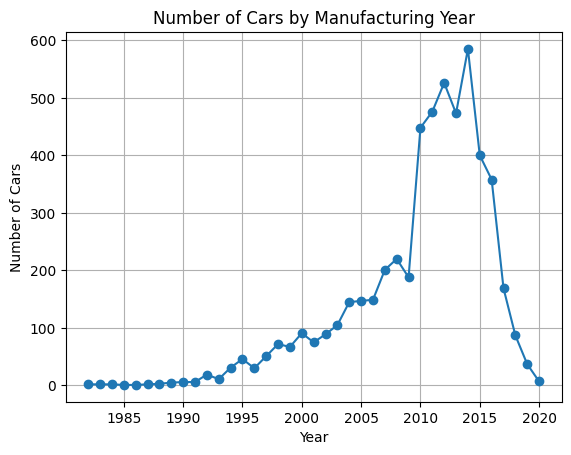

In [49]:
plt.plot(years.sort_index().index, years.sort_index().values, marker='o')
plt.title('Number of Cars by Manufacturing Year')   
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

## most safe brands

In [51]:
grp = df.groupby('brand')['airbags'].mean()//1
pd.DataFrame(grp.sort_values(ascending=False)).head(10)

,airbags
brand,
acura,12.0
chrysler,12.0
gmc,12.0
land rover,11.0
cadillac,10.0
porsche,9.0
mercedes-benz,8.0
toyota,8.0
mini,8.0


In [52]:
grp = df.groupby('vehiclemodel')['airbags'].mean()//1
pd.DataFrame(grp.sort_values(ascending=False)).head(10)

,airbags
vehiclemodel,
renegade,14.0
veracruz,14.0
tiguan.,14.0
sienna,13.0
yukon,12.0
land rover sport,12.0
yaris rs,12.0
yaris.,12.0
x5 x-drive,12.0
